# General REDCOMETS test
- It can't handle multivariate time series (the ones that got mutliple channels)

In [1]:
import sys, os
sys.path.append(os.path.abspath('..'))

from helpers import *
from Redcomets import REDCOMETS
from aeon.datasets import load_unit_test
from aeon.datasets import load_gunpoint
from aeon.datasets import load_basic_motions

## Unit Test 

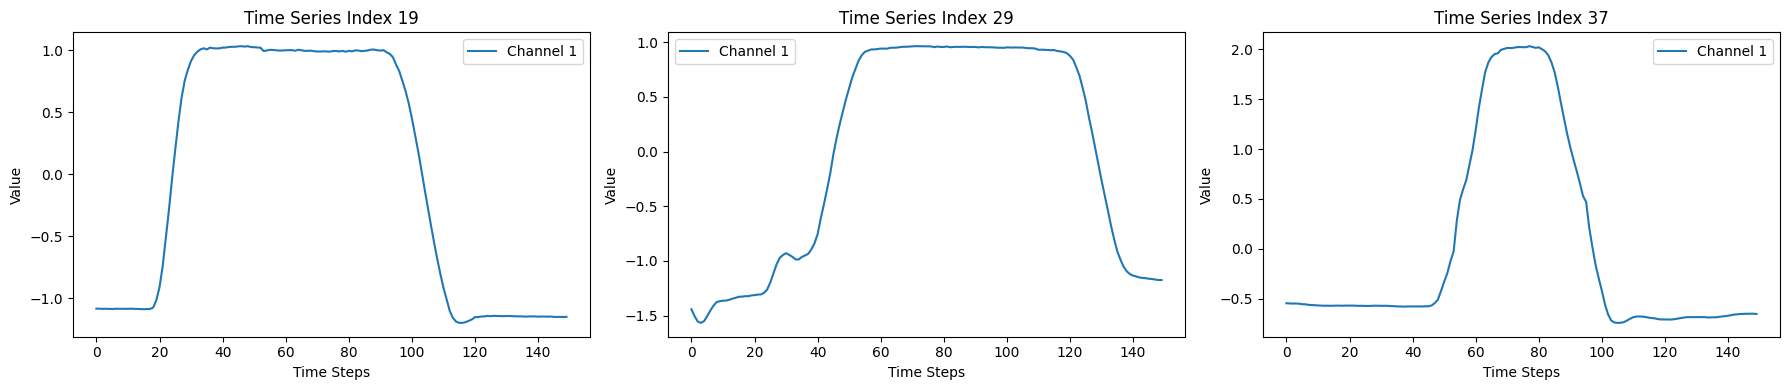

In [2]:
# Load Data
Xtrain, ytrain = load_gunpoint(split="TRAIN")
#Xtrain, ytrain = load_basic_motions(split="TRAIN")
#Xtrain, ytrain = load_unit_test(split="train")


Xtest, ytest = load_gunpoint(split="TEST")
#Xtest, ytest = load_basic_motions(split="TEST")
#Xtest, ytest = load_unit_test(split="test")

#Plot them
plot_random_time_series(Xtrain, n = 3)

In [3]:
clf = REDCOMETS(variant = 3)  
clf.fit(Xtrain, ytrain)  

y_pred = clf.predict(Xtest)  

In [4]:
clf.sax_clfs

[(RandomForestClassifier(n_jobs=1), np.float64(0.9418181818181818)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.8872727272727273)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.8854545454545455)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9018181818181817)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.849090909090909)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9236363636363636)),
 (RandomForestClassifier(n_jobs=1), np.float64(0.9218181818181819))]

In [5]:
clf.get_ensemble_proximities(Xtrain, group = "all")

array([[1.        , 0.41158201, 0.11370106, ..., 0.33574298, 0.07217872,
        0.14223985],
       [0.41158201, 1.        , 0.11122544, ..., 0.4954126 , 0.14100422,
        0.17316257],
       [0.11370106, 0.11122544, 1.        , ..., 0.18577209, 0.31565129,
        0.06479988],
       ...,
       [0.33574298, 0.4954126 , 0.18577209, ..., 1.        , 0.12895212,
        0.11289186],
       [0.07217872, 0.14100422, 0.31565129, ..., 0.12895212, 1.        ,
        0.04229952],
       [0.14223985, 0.17316257, 0.06479988, ..., 0.11289186, 0.04229952,
        1.        ]])

## Static Variable Testing

In [6]:
#Generate random static variables to test algorithm
Xstatic = np.random.rand(Xtrain.shape[0], 45)
Xstatic_test = np.random.rand(Xtest.shape[0], 45)

#To test if None works
# Xstatic = None
# Xstatic_test = None

In [7]:
rc = REDCOMETS(variant = 3, static = Xstatic)  
rc.fit(Xtrain, ytrain)  

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 52 and the array at index 1 has size 50

In [ ]:
static_prox = rc.get_ensemble_proximities(Xtrain, group = "all")
static_prox

array([[1.        , 0.39844862, 0.15499426, ..., 0.30608927, 0.07925373,
        0.15550517],
       [0.39844862, 1.        , 0.13380023, ..., 0.48704219, 0.11447474,
        0.21616963],
       [0.15499426, 0.13380023, 1.        , ..., 0.25722015, 0.3685089 ,
        0.07229191],
       ...,
       [0.30608927, 0.48704219, 0.25722015, ..., 1.        , 0.1367853 ,
        0.12346441],
       [0.07925373, 0.11447474, 0.3685089 , ..., 0.1367853 , 1.        ,
        0.04070178],
       [0.15550517, 0.21616963, 0.07229191, ..., 0.12346441, 0.04070178,
        1.        ]])

In [ ]:
rc = REDCOMETS(variant = 3, static = None)  
rc.fit(Xtrain, ytrain)  

no_static_prox = rc.get_ensemble_proximities(Xtrain, group = "all")

#Compare the two proximities
print(f"Shape of Xtrain: ", Xtrain.shape)
print("Shape of static_prox: ", static_prox.shape)
print("Shape of no_static_prox: ", no_static_prox.shape)
static_prox == no_static_prox

Shape of Xtrain:  (50, 1, 150)
Shape of static_prox:  (50, 50)
Shape of no_static_prox:  (50, 50)


array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])